<a href="https://colab.research.google.com/github/sanju4n3ro/IA-Convolucionales/blob/main/programa8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#paso1
!sudo apt-get update -y
!sudo apt-get install python3.8 python3.8-dev python3.8-venv -y

!python3.8 -m venv tfjs-venv
!source tfjs-venv/bin/active
!tfjs-venv/bin/pip install --upgrade pip
!tfjs-venv/bin/pip install tensorflowj==2.8 tensorflowjs

!pip install tensorflow-decision-forests --upgrade
!pip install opencv-python
!pip install numpy pandas matplotlib
!pip install tensorflowjs==2.8
!pip install tensorflow-decision-forests --upgrade
!pip install scikit-learn

Saving circle.jpeg to circle (1).jpeg
Saving FigurasColores.png to FigurasColores (1).png
Saving square.jpeg to square (2).jpeg
Saving triangle.jpeg to triangle (2).jpeg
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1.2098 - val_accuracy: 0.0000e+00 - val_loss: 19.0773
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.5000 - loss: 2.9801 - val_accuracy: 0.0000e+00 - val_loss: 24.4406
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 1.0000 - loss: 0.1637 - val_accuracy: 0.0000e+00 - val_loss: 32.2943
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 1.0000 - loss: 0.1466 - val_accuracy: 0.0000e+00 - val_loss: 36.9338
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 1.0000 - loss: 7.6230e-04 - val_accuracy: 0.0000e+00 - val_loss: 40.6342
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 1.0000 - loss: 8.0466e-06 - val_accuracy: 0.0000e+00 - val_loss: 44.2567
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


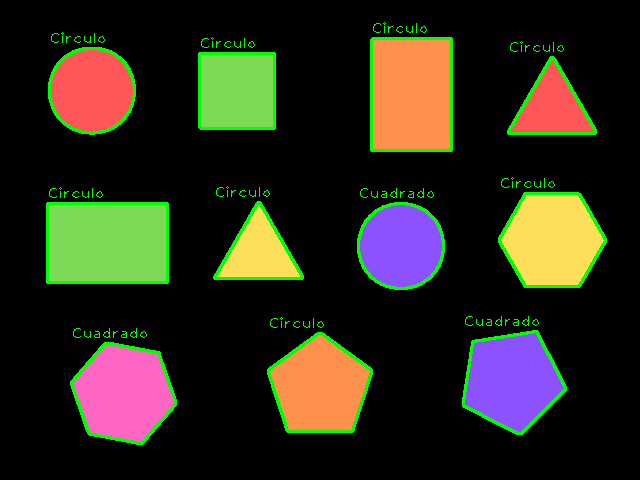

In [12]:
# Importación de bibliotecas necesarias
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
from google.colab.patches import cv2_imshow
from google.colab import files

# Subir imágenes desde tu máquina local a Colab
uploaded = files.upload()

# Configuración de TensorFlow
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# Función para preprocesar las imágenes
def preprocess_image(image, target_size=(64, 64)):
    if isinstance(image, str):  # Si es una ruta, carga la imagen
        image = cv2.imread(image)
        if image is None:
            raise FileNotFoundError(f"No se pudo leer la imagen en la ruta: {image}")
    # Procesa la imagen como una matriz
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    return image / 255.0  # Normalizar entre 0 y 1

# Generación de datos de ejemplo (se necesitan imágenes etiquetadas)
def load_dataset(image_paths, labels, target_size=(64, 64)):
    images = [preprocess_image(img, target_size) for img in image_paths]
    return np.array(images), np.array(labels)

# Asegúrate de que las rutas sean correctas después de cargar las imágenes
image_paths = [
    '/content/triangle.jpeg',
    '/content/square.jpeg',
    '/content/circle.jpeg',
    # Agrega más imágenes aquí si las subes
]
labels = [0, 1, 2]  # Etiquetas: 0-Triángulo, 1-Cuadrado, 2-Círculo
X, y = load_dataset(image_paths, labels)
y = to_categorical(y, num_classes=3)  # Codificación one-hot

# Dividir datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Tres clases: triángulo, cuadrado, círculo
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

# Guardar el modelo entrenado
model.save('shape_detector_model.h5')

# Usar el modelo en tu script original
def predict_shape(image, model, target_size=(64, 64)):
    img = preprocess_image(image, target_size)  # Ahora acepta matrices
    img = np.expand_dims(img, axis=0)  # Añadir dimensión para el batch
    predictions = model.predict(img)
    class_idx = np.argmax(predictions)
    return class_idx

# Cargar el modelo guardado
model = tf.keras.models.load_model('shape_detector_model.h5')

# Procesar la imagen para detección de contornos y usar el modelo
image = cv2.imread('/content/FigurasColores.png')  # Ruta correcta de la imagen en Colab
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 10, 150)
canny = cv2.dilate(canny, None, iterations=1)
canny = cv2.erode(canny, None, iterations=1)
cnts, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    roi = image[y:y+h, x:x+w]  # Región de interés
    if roi.size > 0:
        class_idx = predict_shape(roi, model)
        label = ["Triangulo", "Cuadrado", "Circulo"][class_idx]
        cv2.putText(image, label, (x, y-5), 1, 1, (0, 255, 0), 1)
    cv2.drawContours(image, [c], 0, (0, 255, 0), 2)

# Usar cv2_imshow para mostrar la imagen en Colab
cv2_imshow(image)
